In [ ]:
from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Ver Códogo"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def toggle_code():
    display(HTML(toggle_code_str))


# Métodos de interpolación y evaluación de polinomios
Se define la *interpolación* como un método matemático para la obtención de nuevos puntos partiendo del conocimiento de un conjunto de puntos, la idea principal es construir una función (o polinomio) a partir de los datos dados que se aproxime a la función original que los creó, la interpolación también se usa para la aproximación de una función complicada por una más simple de calcular, así ahorrando tiempo de computación. A continuación la lista de métodos que se estudiarán en este documento:

  * [Interpolación lineal](#Interpolación_lineal).
  * [Polinomio de Lagrange](#Polinomio_de_Lagrange), problemas que conlleva, y soluciones.
  * [Diferencias divididas](#Diferencias_divididas).
  * [Interpolación de Hermite](#Interpolación_de_Hermite).
  * [Método de Horner](#Método_de_Horner).
  * [Interpolación con splines cúbicos](#Interpolación_con_splines_cúbicos).

la interpolación no debe confundirse con la *extrapolación* que es el proceso de estimar más allá del intervalo de observación original. Para entender mejor la interpolación veamos primero el siguiente teorema.

### Teorema de aproximación de Weierstrass
 Suponga que $f(x)$ es definida y continua en $[a,b]$, entonces, para cada $\varepsilon > 0$
 existe un Polinomio $P(x)$ con la propiedad que,

 $$|f (x) − P(x)| < \varepsilon,$$    
        
para todo $x$ en $[a,b]$.

|![](Weierstrass1.png)|
|:--:|
| *Figura: gráficos de $y=f(x)\pm\varepsilon$ y $y=P(x)$, Aproximación de Weierstrass*|


en otras palabras, este teorema garantiza que se puede remplazar la función original por un polinomio; el cuál es más simple de calcular.

<a id='Interpolación_lineal'></a>
## Interpolación lineal

Es la más simple de todas las técnicas de interpolación y consiste en aproximar la función $y=f(x)$ con una linea recta cada par de puntos consecutivos $P=(x_i,y_i)$ y $P'=(x_{i+1},y_{i+1})$ es decir,

$$y = y_i+\frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i).$$

Note que esta ecuación se obtiene de observar que la pendiente de la recta es constante entre los puntos $P$ y $P'$, es decir, $m=\frac{y-y_i}{x-x_i}=\frac{y_{i+1}-y_i}{x_{i+1}-x_i}$. El problema es que la función no es suave y su derivada a cada punto $(x_i,y_i)$ no existe. A continuación la implementación en python.

In [ ]:
#------------------- Interpolación lineal ----------------------------
import numpy as np
import matplotlib.pyplot as plt

def Interpolacion_lineal(xi,yi, n=10):
   ''' Interpolación lineal, esta función toma 2 arrays.
       y grafica la interpolacion usando 5 puntos.'''

   for i in range(len(xi)-1):
      # dividimos el intervalo i,i+1 en n pedasos
      x = np.linspace(xi[i], xi[i+1], n, endpoint=False) # no usar el último punto

      # funcion que hace interpolacion lineal en i,i+1
      f = lambda x: yi[i]+(yi[i+1]-yi[i])/(xi[i+1]-xi[i])*(x-xi[i])

      # array con los puntos interpolados en el intervalo i,i+1
      y = np.array([ f(xk) for xk in x ]) # xk son los valores de x en i,i+1

      plt.plot(x,y,".", ms=1)  # grificar los 5 datos x,f(x) interpolados

   plt.show()
   plt.greed()

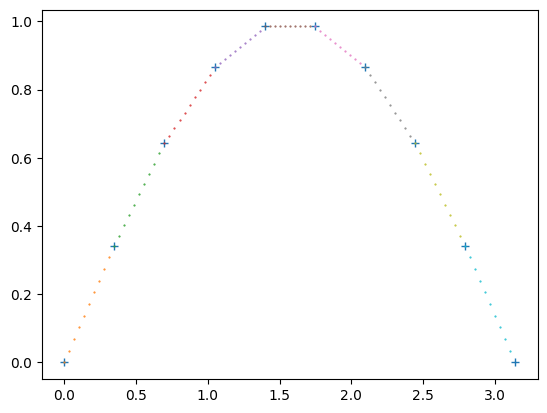

In [ ]:
# datos a interpolar, en este caso se generan por la función seno:
xi = np.linspace(0,np.pi,10)# 20 datos tomados en (0,pi)
yi = np.sin(xi)
plt.plot(xi,yi,'+')         # graficar los puntos a interpolar
Interpolacion_lineal(xi,yi) # llamamos la función que es evaluada n
                            # veces entre cada par de puntos

<a id='Polinomio_de_Lagrange'></a>
# Método de Lagrange


Este es un método clásico de interpolación y es mejor que el anterior en el sentido de que la función es suave. Considere $n+1$ puntos distintos a interpolar, y tal que

$$y_k=f (x_k) = P(x_k),\quad \text{ para }\quad k = 0, 1,... , n,$$

donde $P(x_k)$ es un polinomio dado por,

$$P(x) = f (x_0)L_0(x)+... +f(x_n)L_n(x) =\sum^n_{k=0} y_kL_k(x),$$

para cada $k = 0, 1, ... , n,$ y

$$
L_k(x) = \frac{(x − x_0)(x − x_1) ... (x − x_{k−1})(x − x_{k+1}) ... (x − x_n)}{(x_k − x_0)(x_k − x_1) ... (x_k − x_{k−1})(x_k − x_{k+1}) ... (x_k − x_n)}
=\prod_{\substack{i=0\\i\neq k}}^{n}\frac{(x − x_i)}{(x_k − x_i)},
$$

Note que $L_k(x_i) = 0$ para $i\neq k$ y $L_k(x_k) = 1$, pues $y_k=P(x_k)$.  

|![](Lagrange_Lk1.png)|
|:--:|
| *Figura: función $L_k(x)$*|

El error es dado por,

$$
f (x) = P(x) + \frac{f^{(n+1)}(ξ(x))}{(n + 1)!} (x − x_0)(x − x_1) ... (x − x_n),
$$

donde $ξ$ es un número desconocido en $[x_0,x_n]$. Note que una vez conocido el polinomio ya se puede aproximar la función en valores de $x$ diferentes a los valores de interpolación $x_i$.


**Ejemplo 1)**: interpolar la función $f(x)=\sqrt{x}$ para los puntos $(1/2, 1, 2)$.
Se tiene que y toma los valores $(1/\sqrt{2}, 1, \sqrt{2})$, el polinomio es de grado dos dado por,

$$P_2(x)=y_0L_0+y_1L_1+y_2L_2,$$

donde,

$$
L_0(x)=\frac{(x − x_1)(x − x_2)}{(x_0 − x_1)(x_0 − x_2)}=\frac{4}{3}(x − 1)(x − 2)\\
L_1(x)=\frac{(x − x_0)(x − x_2)}{(x_1 − x_0)(x_1 − x_2)}= -2(x − 1/2)(x − 2)\\
L_2(x)=\frac{(x − x_0)(x − x_1)}{(x_2 − x_0)(x_2 − x_1)}= \frac{2}{3}(x − 1/2)(x − 1)
$$

remplazando en polinomio,

$$P_2(x)= \frac{1}{\sqrt{2}}\times\frac{4}{3}(x − 1)(x − 2) + 1\times[-2(x − 1/2)(x − 2)]+\sqrt{2}\times\frac{2}{3}(x − 1/2)(x − 1),$$

finalmente,

$$f(x)\approx P_2(x)=−0.11438\,x^2 + 0.75736\,x + 0.35702.$$

Implementación del polinomio de lagrange en python:

In [1]:
#--------------- Polinomio  de Lagrange metodo 1 -------------------------
import numpy as np
import matplotlib.pyplot as plt


def P_n(xi,yi,x):
    '''
     *** P_n(x): polinomio de grado n evaluado en x ***
    Función del polinomio de lagrange (forma
    intuitiva de programación a partir de la definición).
    '''

    n = len(xi)          # grado del polinomio
    S = 0.0              # inicialización sumatoria
    for k in range(n):   # Sumatoria del polinomio en n+1 elementos
        # Forma intuitiva a partir de la fórmula
        L = 1
        for i in range(n):
            if i != k:
                L = L*(x-xi[i])/(xi[k]-xi[i])

        S  = S + yi[k]*L

    return S


**Ejemplo 2)** en el ejemplo 1) encontramos analíticamente que, $f(x)=\sqrt{x} \approx −0.11438\,x^2 + 0.75736\,x + 0.35702 $, al interpolar en puntos $ x_i = (1/2, 1, 2)$ y $y_i =(1/\sqrt{2}, 1, \sqrt{2})$, verifiquemos con `sympy` que la rutina anterior recupera este polinomio:

In [2]:
import sympy as sp
sp.init_printing(use_latex='mathjax') # para imprimir de manera bonita (latex)
x=sp.Symbol('x')                      # crear variable simbolica
#xi=[sp.Rational(1,2),1,2]
#yi=[1/sp.sqrt(2),1,sp.sqrt(2)]
xi=[1/2,1,2]
yi=[1/np.sqrt(2),1,np.sqrt(2)]
sp.expand(P_n(xi,yi,x))
#P_n(xi,yi,x)

                     2                                          
- 0.114381916835873⋅x  + 0.757359312880715⋅x + 0.357022603955158

Si comparamos al valor analítico vemos que este es en verdad el resultado esperado para $P_2(x)$. Al final en el [complemento](#Notación_Burden) se dan códigos adicionales más eficientes para el método de lagrange.

**Ejemplo 3)** interpolar 5 datos de la función seno en el intervalo $[0,\pi]$ y comparar a la función, en este caso se generan por la función seno:

In [ ]:
#-------------------- Interpolación de Lagrange --------------------------
# Se hace una segunda función que llama P_n interpola
def Interpolacion_Lagrange(xi,yi,eps):
   ''' Esta funcion toma n+1 pares (xi,yi) de datos y los interpola
       en intervalo (x0,xn) usando el metodo de lagrange.'''

   n = len(xi)-1 # el array tiene n+1 elementos.
   print ("El grado del Pn(x) es:",n)

   x = np.arange(xi[0],xi[n], eps)  # Valores a interpolar
   P = np.array([P_n(xi,yi,xk) for xk in x]) # Polinomio P(x) de grado n evaluado en x

   plt.plot(x,P,label="Lagrange")       # Graficar interpolación de lagrange.
   plt.legend()
   plt.show()

El grado del Pn(x) es: 4


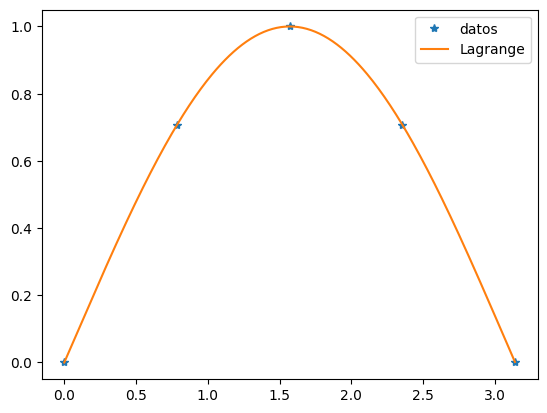

In [ ]:
# ejemplo 3
xi = np.linspace(0,np.pi,5)# 5 datos tomados en (0,pi).
yi = np.sin(xi)            # 5 datos tomados de la función seno.
plt.plot(xi,yi,'*',label='datos')  # graficar los puntos a interpolar

Interpolacion_Lagrange(xi,yi, 0.01) # llamamos la función

En este caso el polinomio que aproxima sen$(x)$ en $[0,\pi]$ es:


In [ ]:
x = sp.Symbol('x') # crear variable simbolica
f = sp.expand(P_n(xi,yi,x))
f
# Si desea solo 3 cifras significativas habilite estas lineas:
#d = {n : round(n,3) for n in f.atoms(sp.Number)} # diccionario con remplazos
#f.xreplace(d)                                    # imprima con menos cifras

                    4                      3                       2          
0.0375757673118033⋅x  - 0.236095509079522⋅x  + 0.0582877134742557⋅x  + 0.98196

            
8385299078⋅x

**Ejemplo 4)** En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

Note en la siguiente gráfica el problema de los picos que no son propios de la función sino del polinomio de grado 8 usado:

El grado del Pn(x) es: 8


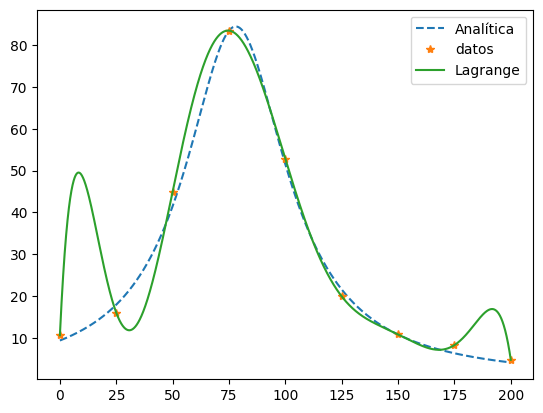

In [ ]:
# -------------- función de Breit-Wigner -----------------------
Er, Gamma = 78, 55 # en MeV
E = 75
sigma0 = 83.5*((E - Er)**2. + Gamma**2./4.)
sigma_ana = lambda E: sigma0/((E - Er)**2. + Gamma**2./4.)
E = np.linspace(0,200,1000)
plt.plot(E,sigma_ana(E),'--',label='Analítica')

#--------------- grafico de puntos a interpolar -----------------
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
plt.plot(Energia,sigma_exp,"*",label='datos')

#--------------- interpolación de lagrange ----------------------
Interpolacion_Lagrange(Energia,sigma_exp, 0.01) # llamamos la función

Y el polinomio es:

In [ ]:
E = sp.Symbol('x') # crear variable simbólica
f = sp.expand(P_n(Energia,sigma_exp,E)) # calcular polinomio y guardar en f

# Si desea solo 3 cifras significativas habilite estas lineas:
d = [(n,'%0.3g'%n) for n in f.atoms(sp.Number)] # lista con sustituciones
f.subs(d)    # imprimir con menos cifras significativas

            8             7            6            5             4           
- 1.16e-13⋅x  + 9.98e-11⋅x  - 3.54e-8⋅x  + 6.63e-6⋅x  - 0.000694⋅x  + 0.0396⋅x

3         2                
  - 1.09⋅x  + 11.4⋅x + 10.6

Note los picos que aparecen entre  0 y 25, y 175 y 200, esto es debido a que el polinomio es de grado 8.

**Tarea**: Para evitar los picos que no son propios de la teoría es mejor hacer la interpolación con polinomios de grado menor, repita el cálculo pero con polinomios de grado 2, cada 3 puntos.

**Ejercicio**: Incrementar los datos no ayudará pues se incrementa el grado del polinomio, use la función analítica, $\sigma(E)$, para generar más puntos de interpolación, por ejemplo use 18 puntos y grafique, luego aumente a 27, 50 y grafique otra vez ¿Qué observa?

In [ ]:
# Solución:
#Ei = np.linspace(0,200,18)
#Yi = sigma_ana(Ei)
#
#plt.plot(Ei,Yi, '*')
#Interpolacion_Lagrange(Ei,Yi, 0.01)


##------------ El polinomio es: ------------------------------
#E = sp.Symbol('x') # crear variable simbolica
#f = sp.expand(P_n(Ei,Yi,E)) # calcular polinomio y guardar en f
#
#d = [(n,'%0.3g'%n) for n in f.atoms(sp.Number)] # lista con sustituciones
#f.subs(d)    # imprimir con menos cifras significativas

### Recursividad en programación
Es una herramienta en la cual la función se invoca a sí misma, veamos esto con el cálculo de la función factorial $f(n)=n!=n(n-1)(n-2) ... 3\times2\times1$, la implementación es:

In [ ]:
# factorial recursivo
def facr(n):
    if n==0: return 1
    else:    return n*facr(n-1)


# factorial iterativo
def faci(n):
    if n==0: return 1
    i=1
    f=1
    while i<n:
        i=i+1
        f=f*i
    return f

print ('factorial recursivo',facr(4))
print ('factorial iterativo',faci(4))

factorial recursivo 24
factorial iterativo 24


**Ejercicio**:
usar el comando `%timeit` en Ipython para mirar cuál de estas implementaciones es más rápida.

In [ ]:
# Tarea anterior comparar tiempos
%timeit faci(100)
%timeit facr(100)

43.6 µs ± 15.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
67.2 µs ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<a id='Diferencias_divididas'></a>
# Método de diferencias divididas


Otra manera de representar el polinomio $P_n(x)$ mediante manipulación algebraica es,

$$P_n(x) = a_0 + a_1(x-x_0)+ a_2 (x-x_0)(x-x_1)+\cdots + a_n(x-x_0)\cdots (x-x_{n-1})$$

donde los valores $a_i$ son constantes a determinar a partir de los $n+1$ puntos $(x_i, y_i)$.
Note que como por definición,

$$P_n(x_0) = a_0 = y_0,$$

ahora, si se evalua a $x_1$,

$$P_n(x_1) = a_0 + a_1(x_1-x_0) = y_0 + a_1(x_1-x_0) = y_1, $$

da,

$$a_1 = \frac{f(x_1)-f(x_0)}{x_1-x_0}.$$

Para calcular el resto de los coeficientes $a_i$ se define la diferencia dividida cero como,

$$D_0[x_i] = f(x_i) = y_i,$$

y la primera diferencia dividida de $x_i$ se define por,

$$D_1[x_i] = \frac{D_{0}[x_{i+1}]-D_{0}[x_{i}]}{x_{i+1}-x_i}, $$

en general, se define la $k$-esima diferencia dividida por,

$$D_k[x_i] = \frac{D_{k-1}[x_{i+1}]-D_{k-1}[x_{i}]}{x_{i+k}-x_i}$$

esta expresión define la siguiente secuencia,

$$
\begin{matrix}
\hline &\hline    &\hline  &\hline &\hline \\
\bf x  & \bf f(x) &   \text{1 diferencias divididas}     &     \text{ 2 diferencias divididas}          &   \text{ 3 diferencias divididas}\\
\hline &\hline    &\hline  &\hline &\hline \\
x_0 & D_0[x_0]=f(x_0) &                                            &                                            &\\
    &          & D_1[x_0]=\frac{D_0[x_1]-D_0[x_0]}{
x_1-x_0} &                                            &\\
x_1 & D_0[x_1]=f(x_1) &                                            & D_2[x_0]=\frac{D_1[x_1]-D_1[x_0]}{
x_2-x_0} &\\
    &          & D_1[x_1]=\frac{D_0[x_2]-D_0[x_1]}{
x_2-x_1
} &                                            & D_3[x_0]=\frac{D_2[x_1]-D_2[x_0]}{
x_3-x_0}\\
x_2 & D_0[x_2]=f(x_2) &                                            & D_2[x_1]=\frac{D_1[x_2]-D_1[x_1]}{
x_3-x_1} &\\
    &          & D_1[x_2]=\frac{D_0[x_3]-D_0[x_2]}{
x_3-x_2} &                                            &
D_3[x_1]=\frac{D_2[x_2]-D_2[x_1]}{
x_4-x_1}\\
x_3 & D_0[x_3] =f(x_3)&                                            & D_2[x_2]=\frac{D_1[x_3]-D_1[x_2]}{
x_4-x_2} &\\
    &          & D_1[x_3]=\frac{D_0[x_4]-D_0[x_3]}{
x_4-x_3} &                                            &
D_3[x_2]=\frac{D_2[x_3]-D_2[x_2]}{
x_5-x_2}\\
x_4 & D_0[x_4]=f(x_4) &                                            & D_2[x_3]=\frac{D_1[x_4]-D_1[x_3]}{
x_5-x_3} &\\
    &          & D_1[x_4]=\frac{D_0[x_5]-D_0[x_4]}{
x_5-x_4} &                                            &\\
x_5 & D_0[x_5] =f(x_5)&                                            &                                            &\\
\hline &\hline    &\hline  &\hline &\hline \\
\end{matrix}
$$

donde la diagonal superior da,

$$a_k=D_k[x_0]= \frac{D_{k-1}[x_{1}]-D_{k-1}[x_{0}]}{x_{k}-x_0},$$

que son los coeficientes buscados, es decir que solo se necesita guardar la diagonal superior para calcular la sumatoria, los demás términos solo se usan para obtener estos valores, así el polinomio es,

$$P_n(x) = y_0 + \sum_{k=1}^n D_k[x_0] (x-x_0) \cdots (x-x_{k-1}).$$

Note también que el error del polinomio respecto de $f(x)$ es el mismo que en el caso de Lagrange.
La implementación en python mediante una función recursiva es,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def D( i, k, Xn, Yn ):
    #si k+i>N
    if i+k>=len(Xn):
        return 0
    #1 diferencias divididas
    elif k == 0:
        return Yn[i]
    #k-esimas diferencias divididas
    else:
        return (D(i+1, k-1, Xn, Yn)-D(i, k-1, Xn, Yn))/(Xn[i+k]-Xn[i])

In [ ]:
# Construcción del polinomio:
# Pn(x) = f[x0] + Sum(f[x0,x1,... ,xk](x - xi[0])(x - xi[1]) ... (x - xi[k-1]) )
def Pn(x, xi,yi):
   P = yi[0]                     # Inicializar suma
   for k in range(1,len(xi)):
      prod=1                     # Inicializar multiplicatoria
      for i in range(k):         # Multiplicatoria de 0 a k-1
         prod = prod*(x - xi[i]) # (x - xi[0])(x - xi[1]) ... (x - xi[k-1])

      P = P + D(0,k, xi, yi)*prod# Suma
   return P

# Alternativa 1) en python
def Pn1(x, xi,yi):
   P = yi[0]                     # Inicializar suma
   for k in range(1,len(xi)):
      P = P + D(0,k, xi, yi)*np.prod([ x - xi[i] for i in range(k)])
   return P

# Alternativa 2) en python, la mas eficiente pues guarda el resultado
# anterior en la productoria.
def Pn2(x, xi,yi):
   P = yi[0]                     # Inicializar suma
   prod=1
   for k in range(1,len(xi)):
      prod = prod*(x - xi[k-1])  # (x - xi[0])(x - xi[1]) ... (x - xi[k-1])
      P = P + D(0,k, xi, yi)*prod# Suma
   return P

# Ejemplo: considere los datos
#  x    f (x)

#  1.0  0.7651977
#  1.3  0.6200860
#  1.6  0.4554022
#  1.9  0.2818186
#  2.2  0.1103623
# Donde el polinomio es de grado 4 y para 1.5 da: P_4(1.5) = 0.5118200
xi=np.array([1.0, 1.3, 1.6, 1.9, 2.2])
yi=np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])

Pn(1.5,xi,yi)
# compare con interpolación de lagrange.

0.5118199942386833

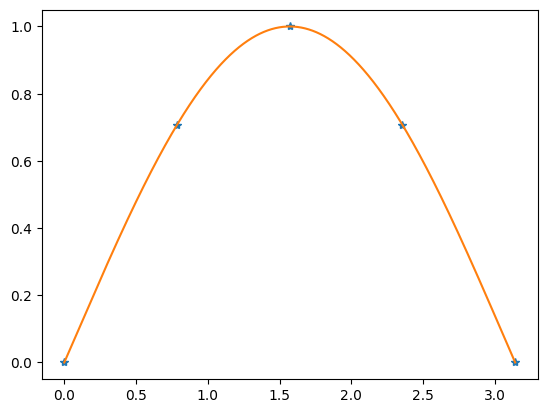

In [ ]:
xi = np.linspace(0,np.pi,5)# 5 datos tomados en (0,pi).
yi = np.sin(xi)            # 5 datos tomados de la función seno.
plt.plot(xi,yi,'*',label='datos')  # graficar los puntos a interpolar
plt.plot(np.linspace(0,np.pi,10000),Pn(np.linspace(0,np.pi,10000),xi,yi))
plt.show()

<a id='Interpolación_de_Hermite'></a>
## Interpolación de Hermite

En este método es es similar a el método de diferencias divididas pero adiciona información del valor de la derivada en los puntos a interpolar. En este caso se define la secuencia $\{z_0, z_1, \cdots, z_{2n+1}\}$ tal que

$$z_{2i} = z_{2i+1} = x_i \quad\mbox{ para }\quad i = 0,1,\cdots, n$$

donde la primera derivada se usa para calcular las diferencias divididas de la siguiente manera,

Note que

$$D_1[z_0] = \frac{D_0[z_1]-D_0[z_0]}{z_1-z_0}=\infty,$$

pero como $z_0 = z_1 = x_0$ esto da una indeterminación, por lo tanto para, $z_0$, se define


$$D_1[z_0] = f'(x_0),$$

para la primera diferencia dividida se tiene,

$$D_1[z_{2i}] = f'(x_i),$$

$$D_1[z_{2i+1}] = D_1[x_i],$$

y las diferencias divididas de orden superior se calcular del modo anteriormente descrito, ósea,

\begin{matrix}
\hline &\hline &\hline  &\hline &\hline\\
\bf z    & \bf  f(z)      &  \text{1 diferencias divididas}         &     \text{ 2 diferencias divididas}&\text{ 3 diferencias divididas} & \\
\hline &\hline &\hline  &\hline &\hline\\
z_0=x_0  &  D_0[z_0]=f(x_0) &                                           & &\\
         &                  & D_1[z_0]=f'(x_0)\quad\quad                       & & \\
z_1=x_0  &  D_0[z_1]=f(x_0) &                                       &D_2[z_0]=\frac{D_2[z_1]-D_2[z_0]}{z_2-z_0} &\\
         &                  & D_1[z_1]=\frac{D_0[z_2]-D_0[z_1]}{z_2-z_1} &                                      & D_3[z_0]=\frac{D_2[z_1]-D_2[z_0]}{z_3-z_0} \\
z_2=x_1  &  D_0[z_2]=f(x_1) &                                       &D_2[z_1]=\frac{D_2[z_2]-D_2[z_1]}{z_3-z_1}\\
         &                  & D_1[z_2]=f'(x_1)\quad\quad                       &                                & D_3[z_1]=\frac{D_2[z_2]-D_2[z_1]}{z_4-z_1} \\
z_3=x_1  &  D_0[z_3]=f(x_1) &                                       &D_2[z_2]=\frac{D_2[z_3]-D_2[z_2]}{z_4-z_2}\\
         &                  & D_1[z_3]=\frac{D_0[z_4]-D_0[z_3]}{z_4-z_3} &                                      & D_3[z_2]=\frac{D_2[z_3]-D_2[z_2]}{z_5-z_2} \\
z_4=x_2  &  D_0[z_4]=f(x_2) &                                       &D_2[z_3]=\frac{D_2[z_4]-D_2[z_3]}{z_5-z_3}\\
         &                  & D_1[z_4]=f'(x_2)\quad\quad                       &\\
z_5=x_2  &  D_0[z_5]=f(x_2) &                                           &\\
\hline &\hline &\hline  &\hline &\hline\\
\end{matrix}

Finalmente, el polinomio de Hermite se define como,

$$H_{2n+1}(x) = D_0[z_0] + \sum_{k=1}^{2n+1} D_k[z_0] (x-z_0) \cdots (x-z_{k-1}),$$

y error es dado por el segundo término en la siguiente expresión,

$$f(x) = H_{2n+1}(x) +\frac{ (x − x_0)^2 . . . (x − x_n )^2}{(2n+2)!}f(ξ(x))^{(2n + 2)}.$$

In [ ]:
#------- Construcción recursiva para diferencias divididas en Hermite ----------
from __future__ import division # si python2.7 para usar // con enteros

def DH(j, k, Zn, Yn, Ypn):
    #If k+j>N
    if j+k>=len(Zn):
        return 0
    #Zeroth divided difference
    elif k == 0:       # Note que al dividir j/2 se hace tipo float en python3,
        return Yn[j//2]# solución: hacer j//2 (o int(j/2)) para obtener entero
    #First order divided difference (even indexes)
    elif k == 1 and j%2 == 0:# Devuelva f'(x0), f' (x1),... , f'(xn) en lugar de las
        return Ypn[j//2] # indefinidas diferencias divididas DH[z0,z1], DH[z2,z3],...,DH[z2n,z2n+1].
    #If higher divided difference
    else:
        return (DH(j+1, k-1, Zn, Yn, Ypn)-DH(j, k-1, Zn, Yn, Ypn))/(Zn[j+k]-Zn[j])

In [ ]:
#---------- Construction del polinomio de Hermite: ---------------------------
def H(x, xi,yi,dyi):  # Polinomio de Hermite de grado 2n+1
   m = len(xi)        # Numero de elementos del array m = n+1
   zi = np.zeros(2*m) # Crear array

   for i in range(m):
       zi[2*i] = zi[2*i+1] = xi[i] # Inicializar array zi

   P = yi[0]               # Inicializar suma
   for k in range(1, 2*m): # suma sobre 2n+1 elementos
      P = P + DH(0,k, zi, yi, dyi)*np.prod([x-zi[i] for i in range(k)])

   return P

#------------------ lo mismo pero Mas eficiente ------------------------------
def H(x, xi,yi,dyi):  # Polinomio de Hermite de grado 2n+1
   m = len(xi)        # Numero de elementos del array m = n+1
   zi = np.zeros(2*m) # Crear array

   for i in range(m):
       zi[2*i] = zi[2*i+1] = xi[i] # Inicializar array zi
#       fz[2*i] = fz[2*i+1] = yi[i] # Inicializar array fz

   P = yi[0]                 # Inicializar suma
   prod = 1
   for k in range(1, 2*m): # suma sobre 2n+1 elementos
      prod = prod*(x - zi[k-1])  # (x - zi[0])(x - zi[1]) ... (x - zi[k-1])
      P = P + DH(0,k, zi, yi, dyi)*prod

   return P

# Ejemplo 2: considere los datos
#  x    f (x)       f'(x)
#  1.3  0.6200860  -0.5220232
#  1.6  0.4554022  -0.5698959
#  1.9  0.2818186  -0.5811571
# Donde el polinomio es de grado 2n+1 = 3 y para 1.5 da H(1.5) = 0.5118277
xi =np.array([1.3, 1.6, 1.9])
yi =np.array([0.6200860, 0.4554022, 0.2818186])
dyi=np.array([-0.5220232, -0.5698959, -0.5811571])

H(1.5,xi,yi,dyi)

0.5118277017283951

In [ ]:
# Ejemplo 3
xi =np.linspace(0,np.pi,10);
yi =np.sin(np.exp(xi) - 2)
dyi=np.exp(xi)*np.cos(np.exp(xi) - 2)
H(0.9,xi,yi,dyi)
# Ejecicio interpolar el seno en el intervalo (0,pi) y comparar con lagrange.


0.4402166830129087

## Método de Horner
<a id='Método_de_Horner'></a>
Ya hemos visto varias formas de expresar un polinomio (Taylor, Lagrange, diferencias divididas), pero al momento de evaluar el polinomio  una forma poco practica es evaluar uno por uno todos los términos  (si las potencias $x^n$ se calculan mediante la repetición de $n$ multiplicaciones), pues la complejidad  de este enfoque es del orden de $O(n^2)$, el método de Horner se puede usar para evaluar polinomios en $O(n)$, considere el polinomio

$$
\begin{align}
P_n(x) &= \sum\limits_{i=0}^{n} \ a_i \ x^i = a_{0}+a_{1}x+a_{2}x^{2}+a_{3}x^{3}+\cdots +a_{n}x^{n},
\end{align}
$$

el método de Horner es

$$
P_n(x)= a_{\small{0}} + \Bigg(a_{\small{1}} + \bigg(a_{\small{2}} + \Big(a_{\small{3}} + \,... \big(a_{\small{n-2}} + (a_{\small{n-1}} + a_{\small{n}} \,x \,)x \, \big)x \ ...\Big)x \, \bigg)x \, \Bigg)x,
$$

este permite evaluar un polinomio de grado $n$ de la manera más optima con solo $n$ multiplicaciones y $n$ sumas.

**Tarea**: Calcular un poliniomio de grado $n$ de manera tradicional (haciendo la primera suma) y con el método de Horner y mostar que los tiempos computo son del orden de $n^2$ y $n$ respectivamente.

In [ ]:
# Hacer Tarea:

<a id='Interpolación_con_splines_cúbicos'></a>
# Interpolación con esplines cúbicos


Los esplines cúbicos es uno de los métodos más empleados, pues proporciona un excelente ajuste de los datos y su cálculo no es excesivamente complejo. La técnica consiste en usar polinomios cubicos entre cada par de datos sucesivos $(x_j,x_{j+1})$, con $j = 0,1, ... ,n − 1$, así,
    
$$S_j(x) = a_j + b_j(x − x_j) + c_j(x − x_j)^2 + d_j(x − x_j)^3,$$

donde la primera y segunda derivadas son dadas por,

$$
\begin{align}
S'_j(x)   =&\, b_j + 2c_j(x − x_j) + 3d_j(x − x_j)^2,\\
S''_j(x)  =&\, 2c_j + 6d_j(x − x_j),\\
S'''_j(x) =&\, 6d_j.\\
\end{align}
$$

Además también sirve como un método poderoso de integración, es decir se interpola una la función a integrar con esplines cúbicos y luego se integra de manera analítica,

$$
\begin{align}
\int_{x_j}^{x_{j+1}} f(x)\,dx
\approx &\,\int_{x_j}^{x_{j+1}}\left(a_j + b_j(x − x_j) + c_j(x − x_j)^2 + d_j(x − x_j)^3\right)\,dx,\\
\approx &\,\left(a_j(x_{j+1} − x_j) + \frac{b_j}{2}(x_{j+1}− x_j)^2 + \frac{c_j}{3}(x_{j+1} − x_j)^3 + \frac{d_j}{4}(x_{j+1} − x_j)^4\right),\\
\approx &\,\left(f_j(x_{j+1} − x_j) + \frac{f'_j}{2}(x_{j+1} − x_j)^2 + \frac{f''_j}{3}(x_{j+1} − x_j)^3 + \frac{f'''_j}{4}(x_{j+1} − x_j)^4\right),
\end{align}
$$

donde en la última expresión los  coeficientes se relacionan a las derivadas de, $f_j=f(x_j)$, por expansión de Taylor; obviamente el valor de la integral será la suma sobre todos los intervalos. Hacer los intervalos de interpolación muy pequeños no siempre funciona pues puede haber cancelación sustractiva.

### Condiciones para el cálculo de esplines cúbicos
Si hay $n+1$ datos a interpolar, hay $n$ ecuaciones cúbicas y $4n$ constantes $a_j, b_j, c_j, d_j$ a encontrar, si la función es conocida solo es calcular la función y las tres primeras derivadas a cada $x_j$, pero si solo se conoce el valor de la función a cada punto $x_j$ entonces para las $S_j(x)$ además de la función se exige condiciones de continuidad en la primera y segunda derivadas a cada punto de interpolación excepto en los extremos, ósea, que se deben satisfacer las siguientes condiciones:

1. $S_j(x_j) = f(x_j)$ y $S_j(x_{j+1}) = f(x_{j+1})$ para cada $j = 0, 1, ... , n-1$;
3. $S_{j+1}(x_{j+1})  =  S_j(x_{j+1})$ para cada $j = 0, 1, ... , n-2$;
4. $S'_{j+1}(x_{j+1}) = S'_j(x_{j+1})$ para cada $j = 0, 1, ... , n-2$;
5. $S''_{j+1}(xj_{+1}) = S''_j(x_{j+1})$ para cada $j = 0, 1, ... , n-2$;
6. Además una de las siguientes condiciones de frontera debe ser satisfecha:

    (i)   $S''(x_0) = S''(x_n) = 0$, frontera natural o libre (o "free boundary");<br>
    (ii)  $S'(x_0) = f'(x_0)$ y $S'(x_n) = f'(x_n)$, frontera sujeta (o "clamped boundary").<br>
    (iii) $S(x_0) = S(x_n)$ frontera periódica.
    
Note que la primera condición aporta $(n+1)$ ecuaciones y las condiciones $3,4$ y $5$ aportan cada una $(n-1)$ ecuaciones, si se suman da un total de $(4n-2)$ ecuaciones, cualquiera de las condiciones $6$ aporta las $2$ restantes ecuaciones necesarias para calcular los coeficientes $a_j, b_j, c_j, d_j$.
Usar condiciones de frontera sujeta es más preciso pero se requiere conocer las
derivadas, por lo tanto la condición más usada es la de frontera natural; para funciones periódicas también se puede demandar $S(x_0) = S(x_n)$.

|![](Cubic_splines1.png)|
|:--:|
| *Figura: Esplines cúbicos*|

La implementación es fácil pero larga de deducir (ver [aquí](https://www.uv.es/~diaz/mn/node40.html) o ver Burden página 145). Al final en el complemento se encuentra la rutina [Spline.py](#Esplines_cubicos_programa) para hacer esplines cúbicos con condiciones de frontera naturales, no obstante en el siguiente código solo usaremos la implementación de [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html), el uso de la rutina Spline.py se deja para los ejercicios propuestos.

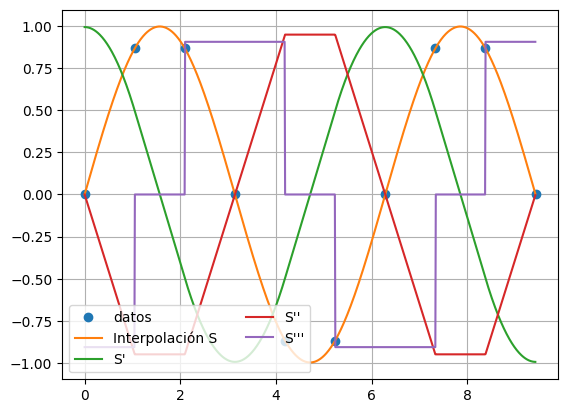

In [ ]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

xj = np.linspace(0,3*np.pi,10)  # datos a interpolar
yj = np.sin(xj)

Sj = CubicSpline(xj, yj, bc_type='natural')#, 'clamped' ,'periodic', 'not-a-knot' (default)
x  = np.arange(0,3*np.pi, 0.01)

plt.plot(xj, yj,"o",label="datos")   # datos para hacer los splines
plt.plot(x, Sj(x),label="Interpolación S")# datos interpolados

plt.plot(x, Sj(x, 1), label="S'")   # curva de primera derivada
plt.plot(x, Sj(x, 2), label="S''")  # curva de segunda derivada
plt.plot(x, Sj(x, 3), label="S'''") # curva de tercera derivada

#plt.xlim(0, 3*np.pi)
plt.legend(loc='lower left', ncol=2)
plt.grid()
plt.show()

**Tarea**: en el problema anterior a) incremente el número de puntos a interpolar de 10 a 20, 100, 200, b) implemente otras condiciones de frontera y analice como cambian las gráficas.

**Problema 1**:  Use el método de esplines para evaluar la función,

$$f(t) = \frac{10 \log{\left (t^{2} + t + 1 \right )}}{10 t^{3} - 20 t^{2} + t - 2}$$

en 7 nodos equiespaciados en el intervalo [$-1,1]$.

1) Construya un espline cúbico $S(t)$ que interpola a $f(t)$ en esos puntos.<br>
2) Dibuje la gráfica del error $e(t)=|f(t)-S(t)|$ y estime el valor en $[-1,1]$. Compare con el resultado de la interpolación polinomial con lagrange.<br>
3) Los valores de las derivadas de $f(t)$ en los extremos del intervalo son aproximadamente $f'(-1)=0.3$ y $f'(1)=-0.09$. Construya el espline sujeto interpolador y dibuje la gráfica de la diferencia entre los dos esplines. ¿Cómo se propaga la influencia de las condiciones de frontera al resto del espline?<br>
4) Compare $S'(t)$ a la derivada analítica $f'(t)$, grafique el error $e(t)$.<br>

Use la librería de "sympy" para obtener la derivada analítica de forma simbólica, ósea,
```python      
import sympy as sp
t = sp.Symbol('t')
y = 10*sp.log(t**2+t+1)/(10*t**3-20*t**2+t-2) # y es función simbólica de t
diff(y,t) # también y.diff(t): derivada de y con respecto a t.
 ```   
No obtante esta derivada es simbólica, use `sympy.lambdify()` para convertirla a una función, $df(t)$, que sea numérica (se puede evaluar en números o arreglos):
```python
df = sp.lambdify(t, y.diff(t), 'numpy') # crear función numérica, similar a "def df(t):"
plt.plot(x,df(x),label="f'(x)")
```
5) ¿Se puede calcular el error relativo, $\varepsilon(t)=|f(t)-S(t)|/|f(t)|$, en vez de, $e(t)$, en el
intervalo? explique su respuesta.

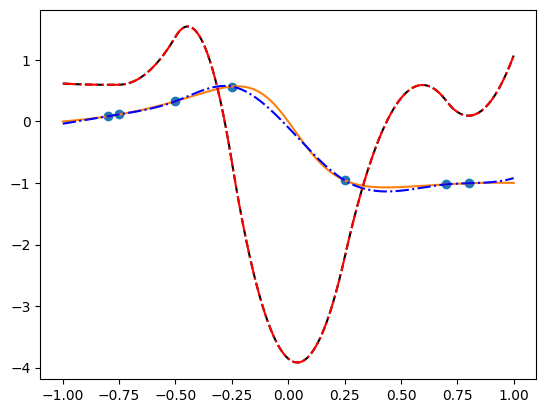

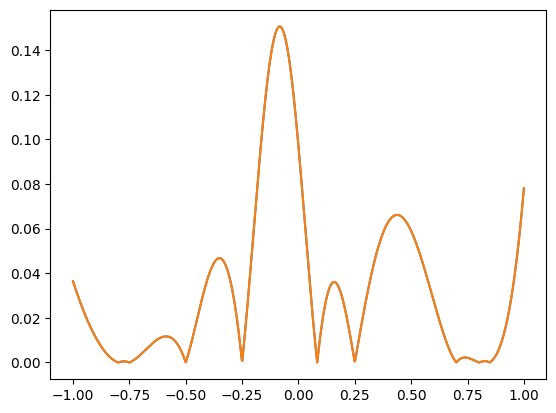

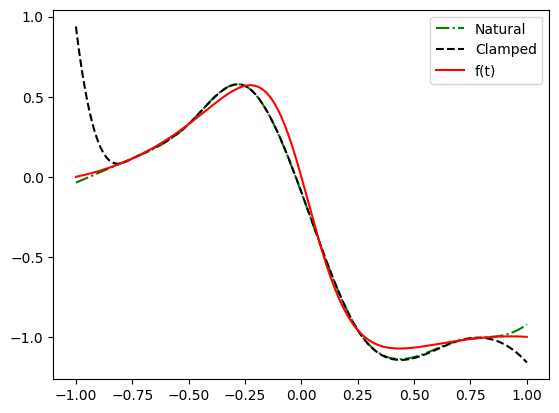

In [ ]:
# Solución
#1)
def f(t):
    return 10*np.log(t**2+t+1)/(10*t**3-20*t**2+t-2)

#xj = np.linspace(-1,1,7) # probar con esta.
xj = np.array([-.8,-.75,-.50,-.25,.25,.70,.8]) # probar otros valores en [-1,1]
yj = f(xj)

t = np.linspace(-1,1,1000)

plt.plot(xj,yj,'o')
plt.plot(t,f(t))

#  Crear función de interpolación Sj(t):
Sj = CubicSpline(xj, yj, bc_type='natural')#, 'clamped' ,'periodic', 'not-a-knot' (default)

plt.plot(t,Sj(t),'b-.')
plt.plot(t,Sj(t,1),'k--')
plt.plot(t,Sj(t,1),'r-.')

# 2) # error = |f(t)-Sj(t)|
plt.figure(2)
plt.plot(t,np.abs(f(t)-Sj(t)))
plt.plot(t,np.abs(f(t)-Sj(t)),)

# 3) Comparemos spines con codición de frontera natural y clamped:
plt.figure(3)
Sj = CubicSpline(xj, yj, bc_type='natural')
Si = CubicSpline(xj, yj, bc_type=((1, 0.3), (1, -0.09)))# clamped

plt.plot(t,Sj(t),'g-.')
plt.plot(t,Si(t),'k--')
plt.plot(t,f(t),'r-')
plt.legend(['Natural','Clamped','f(t)'])

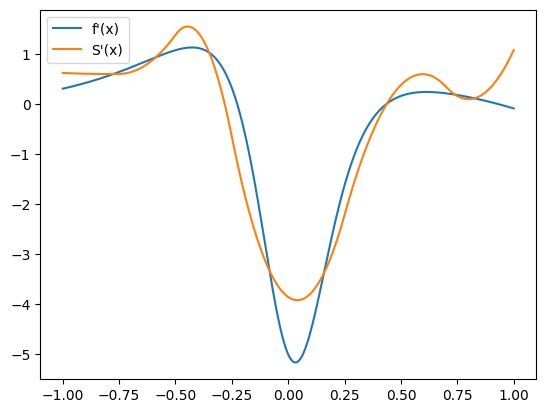

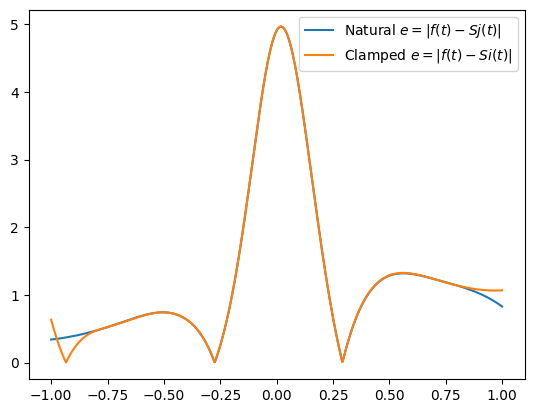

In [ ]:
#4)
import sympy as sp
t = sp.Symbol('t')
y = 10*sp.log(t**2+t+1)/(10*t**3-20*t**2+t-2) # y es función simbólica de t
dy = sp.diff(y,t,1)

# derivada numérica
x = np.linspace(-1,1,1000)
df = sp.lambdify(t, dy, 'numpy') # crear función numérica, similar a "def df(t):"
plt.plot(x,df(x),label="f'(x)")
plt.plot(x,Sj(x,1),label="S'(x)")
plt.legend()

plt.figure(2)
plt.plot(x,abs(df(x)-Sj(x)),label='Natural $e = |f(t)-Sj(t)|$')
plt.plot(x,abs(df(x)-Si(x)),label='Clamped $e = |f(t)-Si(t)|$')
plt.legend()

#5) No se puede calcular el error relativo = |f(t)-Sj(t)|/|f(t)|, hay división por cero.

**Problema 2**: Considere el potencial de coulomb, $V = \frac{kqq'}{r}$, si consideramos $kqq'=1$,
interpole usando esplines con los siguientes valores de
```python
r = [0.1, 0.3, 0.5, 0.8, 1.2, 1.3, 1.6, 2.0]
```
Grafique $S(x)$ y $S'(x)$, compare $S'(r)$ a la fuerza de coulomb $F(r)$.
Calcule el error $|e|$ en cada caso (pruebe también la rutina [Spline.py](#Esplines_cubicos_programa)).

**Problema 3**: para el problema de dispersión (ver tabla de datos en [Spline.py](#Esplines_cubicos_programa)) calcule y grafique el error entre el método de esplines cúbicos, interpolacion lagrange y la función de Breit–Wigner.

**Problema 4**: (difícil) modifique la rutina [Spline.py](#Esplines_cubicos_programa)) para obtener la primera segunda y tercera derivada de los esplines cúbicos.

**Problema 5**: (difícil) Use esplines cúbicos para calcular la integral de la función del problema 1 (use o  modifique la rutina [Spline.py](#Esplines_cubicos_programa)).



# Complemento
<a id='Notación_Burden'></a>
## Notación libro de Burden

En diferencias divididas, en general, se define la $k$-esima diferencia dividida por,

$$D_0[x_i] = f[x_i] = f(x_i) = y_i,$$

$$D_1[x_i] = f[x_i, x_{i+1}] = \frac{f[x_{i+1}]-f[x_i]}{x_{i+1}-x_i}$$

$$D_k[x_i] = f[x_i, x_{i+1},\cdots, x_{i+k-1},x_{i+k}] = \frac{f[x_{i+1},x_{i+2}\cdots, x_{i+k}]-f[x_i, x_{i+1},\cdots, x_{i+k-1}]}{x_{i+k}-x_i}$$


estas espresiones definen la siguiente secuencia,

$$
\begin{matrix}
\hline &\hline    &\hline  &\hline &\hline \\
\bf x  & \bf f(x) &   \text{1 diferencias divididas}     &     \text{ 2 diferencias divididas}          &   \text{ 3 diferencias divididas}\\
\hline &\hline    &\hline  &\hline &\hline \\   
x_0 & f[x_0] &                            &                                    &\\
   &       & f[x_0,x_1]=\frac{f[x_1]-f[x_0]}{
x_1-x_0}  &                                    &\\
x_1 & f[x_1] &                            & f[x_0,x_1,x_2]=\frac{f[x_1,x_2]-f[x_0,x_1]}{
x_2-x_0} &\\
   &       & f[x_1,x_2]=\frac{f[x_2]-f[x_1]}{
x_2-x_1
}  &                                    & f[x_0,x_1,x_2,x_3]=\frac{f[x_1,x_2,x_3]-f[x_0,x_1,x_2]}{
x_3-x_0} \\
x_2 & f[x_2] &                            & f[x_1,x_2,x_3]=\frac{f[x_2,x_3]-f[x_1,x_2]}{
x_3-x_1} &\\
   &       & f[x_2,x_3]=\frac{f[x_3]-f[x_2]}{
x_3-x_2}  &                                    &
f[x_1,x_2,x_3,x_4]=\frac{f[x_2,x_3,x_4]-f[x_1,x_2,x_3]}{
x_4-x_1}\\
x_3 & f[x_3] &                            & f[x_2,x_3,x_4]=\frac{f[x_3,x_4]-f[x_2,x_3]}{
x_4-x_2} &\\
   &       & f[x_3,x_4]=\frac{f[x_4]-f[x_3]}{
x_4-x_3}  &                                    &
f[x_2,x_3,x_4,x_5]=\frac{f[x_3,x_4,x_5]-f[x_2,x_3,x_4]}{
x_5-x_2}\\
x_4 & f[x_4] &                            & f[x_3,x_4,x_5]=\frac{f[x_4,x_5]-f[x_3,x_4]}{
x_5-x_3} &\\
   &       & f[x_4,x_5]=\frac{f[x_5]-f[x_4]}{
x_5-x_4}  &                                    &\\
x_5 & f[x_5] &                            &                                    & \\
\hline &\hline    &\hline  &\hline &\hline \\
\end{matrix}
$$

y de manera similar en los polinomios de Hermite la secuencia es,

$$
\begin{matrix}
\hline &\hline &\hline  &\hline &\hline \\
\bf z    & \bf  f(z)      &  \text{1 diferencias divididas}         &     \text{ 2 diferencias divididas} \\
\hline &\hline &\hline  &\hline  &\hline\\
z_0=x_0  &  f[z_0]=f(x_0) &                                         &\\
         &                & f[z_0,z_1]=f'(x_0)                      &\\
z_1=x_0  &  f[z_1]=f(x_0) &                                         &f[z_0,z_1,z_2]=\frac{f[z_1,z_2]-f[z_0,z_1]}{z_2-z_0}\\
         &                &  f[z_1,z_2]=\frac{f[z_2]-f[z_1]}{z_2-z_1} &\\
z_2=x_1  &  f[z_2]=f(x_1) &                                         &f[z_1,z_2,z_3]=\frac{f[z_2,z_3]-f[z_1,z_2]}{z_3-z_1}\\
         &                &  f[z_2,z_3]=f'(x_1)                     &\\
z_3=x_1  &  f[z_3]=f(x_1) &                                         &f[z_2,z_3,z_4]=\frac{f[z_3,z_4]-f[z_2,z_3]}{z_4-z_2}\\
         &                & f[z_3,z_4]=\frac{f[z_4]-f[z_3]}{z_4-z_3}  &\\
z_4=x_2  &  f[z_4]=f(x_2) &                                         &f[z_3,z_4,z_5]=\frac{f[z_4,z_5]-f[z_3,z_4]}{z_5-z_3}\\
         &                &  f[z_4,z_5]=f'(x_2)                     &\\
z_5=x_2  &  f[z_5]=f(x_2) &                                         &\\
&\hline  &\hline&\hline  &\hline&\hline
\end{matrix}
$$

<a id='códigos_adicionales'></a>
## Complemento 2: códigos adicionales

Dos formas alternativas de calcular la función del polinomio de lagrange de manera más eficiente.

In [ ]:
#--------------- Polinomio  de Lagrange metodo 2 -------------------------
def P_n(x):
    '''
      *** P_n(x): polinomio de grado n evaluado en x ***
    Función del polinomio de lagrange (forma eficiente,
    al usar los metodos de numpy prod() y sum()).
    '''

    N = len(xi)             # el array tiene N = n+1 elementos.
    L = np.zeros(N)         # crear array con zeros
    for k in range(N):      # Sumatoria del polinomio
       #Crear array  para hacer la multi, se excluyen elementos con i == k.
       Lk = np.array([(x-xi[i])/(xi[k]-xi[i]) for i in range(N) if i != k ])

       L[k] = Lk.prod()     # Multiplicar todos los elementos del array Lk.

    return sum(yi*L)

In [ ]:
#--------------- Polinomio  de Lagrange metodo 3 -------------------------
def P_n(x):
    '''
      *** P_n(x): polinomio de grado n evaluado en x ***
    Función del polinomio de lagrange (forma eficiente,
    al usar los metodos de numpy prod() y sum()).
    '''

    N = len(xi)             # el array tiene N = n+1 elementos.
    L = np.zeros(N)         # crear array con zeros
    for k in range(N):      # Sumatoria del polinomio
       #Crear array  para hacer la multi, se excluyen elementos con i == k.
       Lk = where( (xi[k]-xi)!= 0, (x-xi)/(xi[k]-xi), 1)

       L[k] = Lk.prod()     # Multiplicar todos los elementos del array Lk.

    return sum(yi*L)

<a id='Esplines_cubicos_programa'></a>
## Esplines cúbicos programa

In [ ]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# Spline.py  Spline fit with slide to control number of points

from numpy import *
import matplotlib.pyplot as plt


def Splines(x,y,Nfit):
    n = len(x)                                         # N points in table

    y2 = zeros(n);    u = zeros(n)                     # Initialize
    X  = zeros(Nfit); Y = zeros(Nfit)

    for i in range(0, n):
        yp1 = (y[1]-y[0])/(x[1]-x[0])-(y[2]-y[1])/(x[2]-x[1])+(y[2]-y[0])/(x[2]-x[0])

    ypn = (y[n-1] - y[n-2])/(x[n-1] - x[n-2]) - (y[n-2] - y[n-3])/(x[n-2]
                 - x[n-3]) + (y[n-1] - y[n-3])/(x[n - 1] - x[n - 3])
    if (yp1 > 0.99e30):
        y2[0] = 0.
        u[0] = 0.
    else:
        y2[0] = - 0.5
        u[0]  = (3./(x[1] - x[0]) )*( (y[1] - y[0])/(x[1] - x[0]) - yp1)

    for i in range(1, n - 1):                            # Decomposition loop
        sig   = (x[i] - x[i - 1])/(x[i + 1] - x[i - 1])
        p     = sig*y2[i - 1] + 2.
        y2[i] = (sig - 1.)/p
        u[i]  = (y[i+1] - y[i])/(x[i+1] - x[i]) - (y[i]-y[i-1])/(x[i]-x[i-1])
        u[i]  = (6.*u[i]/(x[i + 1] - x[i - 1]) - sig*u[i - 1])/p

    if (ypn > 0.99e30):  qn = un = 0.                      # Test for natural
    else:
        qn = 0.5;
        un = (3/(x[n-1] - x[n-2]) )*(ypn - (y[n-1] - y[n-2])/(x[n-1]-x[n-2]))
    y2[n-1] = (un - qn*u[n-2])/(qn*y2[n-2] + 1.)

    for k in range(n-2, 1, - 1):  y2[k] = y2[k]*y2[k + 1] + u[k]

    for i in range(Nfit):                                   # Begin fit
        xout = x[0] + (x[n - 1] - x[0])*i/(Nfit)
        klo = 0;    khi = n - 1                             # Bisection algor
        while (khi - klo >1):
            k = (khi + klo) >> 1
            if (x[k] > xout): khi  = k
            else: klo = k
        h = x[khi] - x[klo]
        if (x[k] > xout):  khi = k
        else: klo = k
        h = x[khi] - x[klo]
        a = (x[khi] - xout)/h
        b = (xout - x[klo])/h
        yout = a*y[klo]+b*y[khi] +((a*a*a-a)*y2[klo]+(b*b*b-b)*y2[khi])*h*h/6
        #print("xout, yout = ", xout,",", yout,i)
        X[i] = xout;   Y[i] = yout

    return X,Y # data fitted

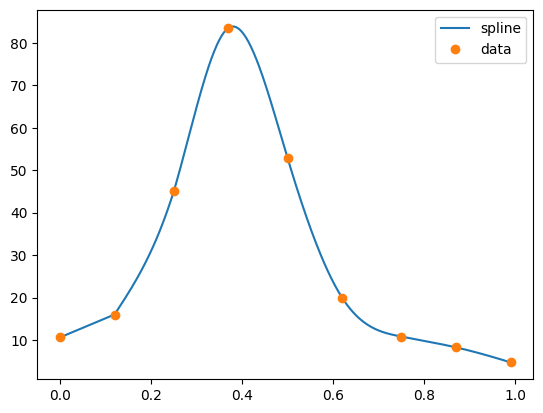

In [ ]:
# Values for a scattering cross section f(E) as a function of energy
x = array([0.,0.12,0.25,0.37,0.5,0.62,0.75,0.87,0.99])
y = array([10.6,16.0,45.0,83.5,52.8,19.9,10.8,8.25,4.7])
# another data:
#x = array([0., 0.1, 0.2, 0.37, 0.5, 0.55, 0.65, 0.77, 0.9])
#y = array([10., 16., 45., 83., 92., 109., 99., 109., 4.])

X,Y = Splines(x,y,500) # cubic spline over 500 points

plt.plot(X, Y,label='spline')
plt.plot(x, y,'o',label='data')
plt.legend()

In [ ]:
# Interpolación con scipy

#import scipy.interpolate
#yj = f(xj)
#pn = scipy.interpolate.lagrange(xj,yj)
#plt.plot(x,pn(x))

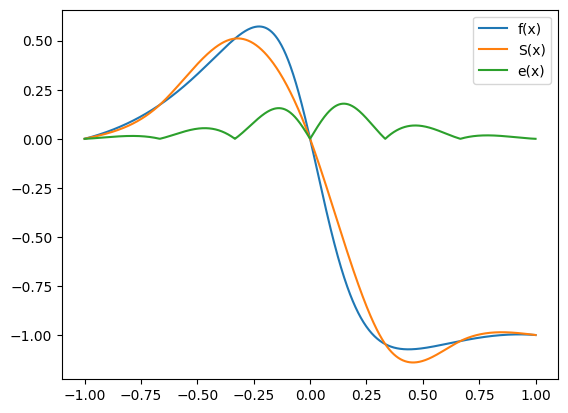

In [ ]:
# problema 1a
from sympy import *
t = Symbol('t')
y = 10*log(t**2+t+1)/(10*t**3-20*t**2+t-2) # y es función simbólica de t
f = lambdify(t, y, 'numpy') # crear función numérica, similar a "def df(t):"
df = lambdify(t, y.diff(t), 'numpy') # crear función numérica, similar a "def df(t):"

x = np.linspace(-1,1,1000)
plt.plot(x,f(x),label="f(x)")
#plt.plot(x,df(x),label="f'(x)")

xi = np.linspace(-1,1,7)
yi = f(xi)
S  = CubicSpline(xi, yi, bc_type='natural')#, 'clampled' ,'periodic', 'not-a-knot' (default)

plt.plot(x,S(x),label="S(x)")
#plt.plot(x,S(x,1),label="S'(x)")
plt.plot(x,np.abs(f(x)-S(x)),label="e(x)")
#Interpolacion_Lagrange(xi,yi, 0.001)


plt.legend()

## Rutina *[interp1d](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)*
Rutina de interpolación alternativa,
```python
scipy.interpolate.interp1d(x, y, kind=tipo)
```
Tiene `kind` las siguientes opciones:
* *nearest*: "snaps" más cercanos al punto de datos más cercano.
*    *zero*: es una spline de orden cero, su valor en cualquier momento es el último valor bruto visto.
*    *linear*: hace interpolación lineal.
*    *slinear*: usa una spline de primer orden. *linar* y *slinear* código diferente y pueden producir resultados similares aunque sutilmente diferentes.
*    *quadratic*: interpolación de segundo orden.
*    *cubic*: interpolación de tercer orden (splines cúbicos).

Ejemplo:

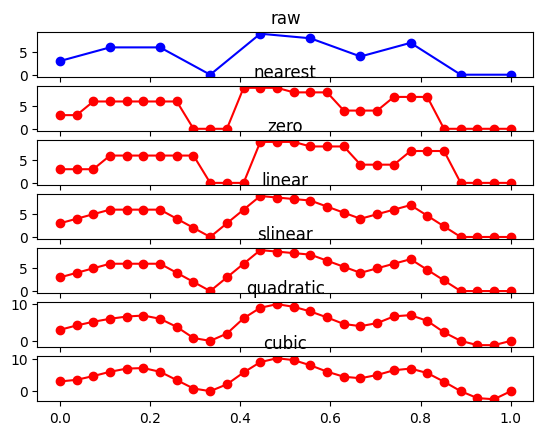

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import  interp1d

np.random.seed(5)      # semilla para producir siempre los mismos arrays
tipos = ('nearest', 'zero', 'linear', 'slinear', 'quadratic', 'cubic')

# ---- datos a interpolar --------
N  = 10
xi = np.linspace(0, 1, N)
yi = np.random.randint(10, size=(N,))
x  = np.linspace(0, 1, 28)          # nuevos datos a interpolar

fig, axs = plt.subplots(nrows=len(tipos)+1, sharex=True)
axs[0].plot(xi, yi, 'bo-')          # graficar datos de entrada
axs[0].set_title('raw')

for ax, tipo in zip(axs[1:], tipos):
    f = interp1d(xi, yi, kind=tipo) # definir función de interpolación
    ax.plot(x, f(x), 'ro-')         # hacer gráfico de nuevos datos
    ax.set_title(tipo)

# Graficos del documento

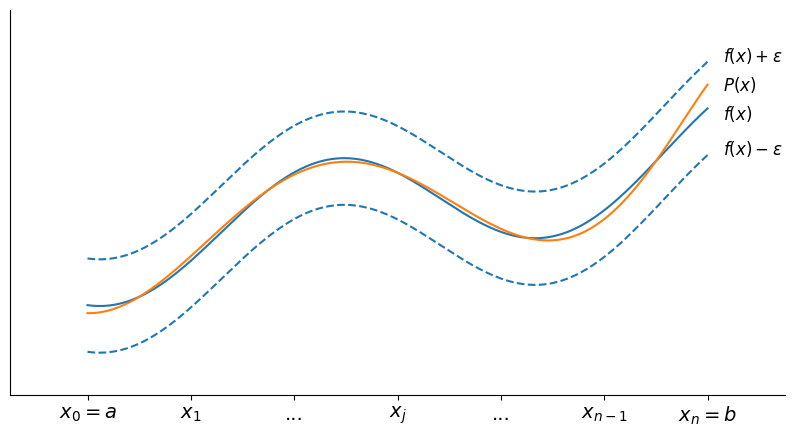

In [ ]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

a,b  = 2,6
f = lambda x: 0.5*np.sin(x*2.2)+0.5*np.exp(0.1*x*2)+5
xi= np.linspace(a-.5,b+.5,7)
yi= f(xi)

P = scipy.interpolate.lagrange(xi,yi)
#P = interp1d(xi, yi, kind=tipo)
x = np.linspace(a,b,1000)

plt.figure(3,figsize = (10,5))
plt.plot(x,f(x),   '-'   )
plt.plot(x,P(x),   'C1-' )
plt.plot(x,f(x)+.4,'C0--')
plt.plot(x,f(x)-.4,'C0--')

plt.text(b+0.1, f(b)-.1,     r'$f(x)  $'   ,size=12)
plt.text(b+0.1, P(b)-.05,     r'$P(x)$'    ,size=12)#, color='C1')
plt.text(b+0.1, f(b)+.4, r'$f(x)+\epsilon$',size=12)
plt.text(b+0.1, f(b)-.4, r'$f(x)-\epsilon$',size=12)
plt.ylim(4.5,7.8)
plt.xlim(1.5,6.5)

x_labels = [r'$x_0=a$',r'$x_1$','...', r'$x_{j}$','...',r'$x_{n-1}$',r'$x_{n}=b$']
id = [i for i in range(len(x_labels)) if x_labels[i]!='...']
xv = np.linspace(a,b,len(x_labels))
plt.xticks(xv, x_labels, fontsize=14)
plt.yticks([])

plt.gca().spines['right'].set_color('none')  # remover linea derecha.
plt.gca().spines['top'].set_color('none')    # remover linea superior.

plt.savefig("Weierstrass1.png",transparent=True,format='png')
display(HTML(toggle_code_prepare_str + toggle_code_str))

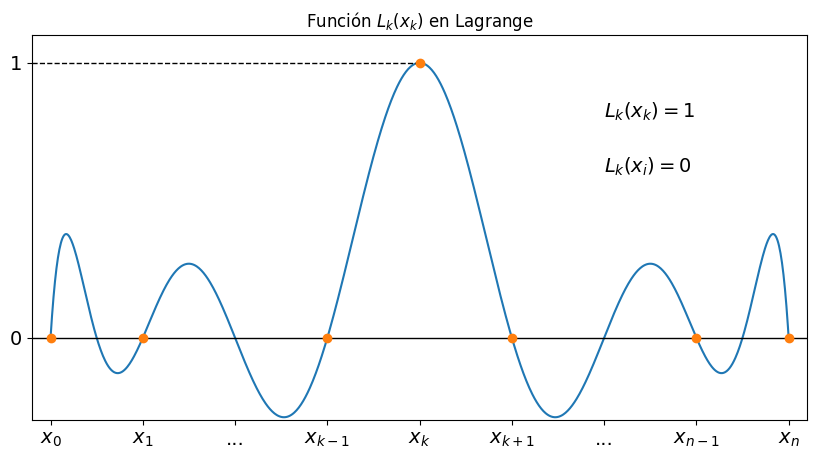

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_labels = [r'$x_0$',r'$x_1$','...', r'$x_{k-1}$',r'$x_{k}$',r'$x_{k+1}$','...',r'$x_{n-1}$',r'$x_{n}$']
id = [i for i in range(len(x_labels)) if x_labels[i]!='...']
xv = np.linspace(0,8,len(x_labels))

# puntos de interpolación
xi= np.array([0,.5,1,  2,  3,4,5,  6,  7,7.5,8])
x = np.linspace(0,8,1000) # puntos a interpolar

def f(x):
    n = len(x)
    y = np.zeros(n)
    for j in range(n):
        y[j] = np.prod([ (x[j]-xi[i])/(4-xi[i]) for i in range(len(xi)) if xi[i]!=4])
    return y

#plt.rcParams['axes.spines.left'] = True #False
#plt.rcParams['axes.spines.right'] = False
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.bottom'] = False

plt.figure(figsize=(10,5))
#plt.axes(frameon = 0)
ax = plt.gca()
#ax.spines['bottom'].set_position('zero')

plt.plot(x,f(x))
plt.plot([-.2,8.2],[0,0],'k-',lw=1)
plt.plot([-.2,4],[1,1], 'k--',lw=1)
plt.plot(xv[id],f(xv[id]),'o')

plt.ylim(-.3,1.1)
plt.xlim(-.2,8.2)
plt.yticks([0,1],['0','1'],fontsize=14,)
plt.xticks(xv, x_labels, fontsize=14)

plt.title("Función $L_k(x_k)$ en Lagrange")
plt.text(6,0.8, r'$L_k(x_k)=1$',fontsize=14)
plt.text(6,0.6, r'$L_k(x_i)=0$',fontsize=14)

# Ocultar código (ver primera celda de este documento)
plt.savefig("Lagrange_Lk1.png",transparent=True,format='png')
display(HTML(toggle_code_prepare_str + toggle_code_str))

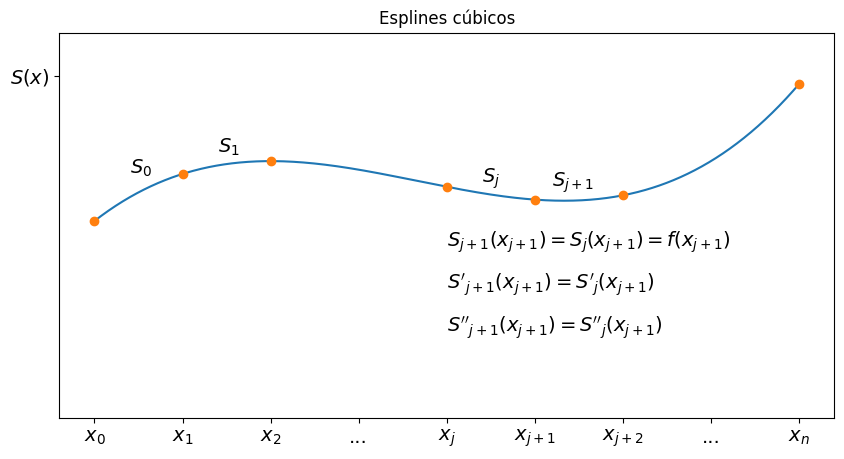

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_labels = [r'$x_0$',r'$x_1$',r'$x_2$','...', r'$x_{j}$',r'$x_{j+1}$',r'$x_{j+2}$','...',r'$x_{n}$']
id = [i for i in range(len(x_labels)) if x_labels[i]!='...']
xv = np.linspace(0,4,len(x_labels))

x = np.linspace(0,4,1000)
f = lambda x: 4-(x-1)**2+.4*(x-1)**3

plt.figure(figsize=(10,5))
plt.plot(x,f(x))
plt.plot(xv[id],f(xv[id]),'o')

plt.ylim(-2,7)
plt.xlim(-.2,4.2)
plt.yticks([6],['$S(x)$'],fontsize=14,)
plt.xticks(xv, x_labels, fontsize=14,)

plt.title("Esplines cúbicos")
plt.text(xv[0]+.2,f(xv[1]), r'$S_0$'     ,fontsize=14, )
plt.text(xv[1]+.2,f(xv[2])+.2,r'$S_1$'   ,fontsize=14, )
plt.text(xv[4]+.2,f(xv[4])+.1, r'$S_{j}$',fontsize=14, )
plt.text(xv[5]+.1,f(xv[4]), r'$S_{j+1}$' ,fontsize=14, )

plt.text(xv[4],2, r'$S_{j+1}(x_{j+1})  =  S_j(x_{j+1}) = f(x_{j+1})$',fontsize=14, )
plt.text(xv[4],1, r"$S'_{j+1}(x_{j+1})  =  S'_j(x_{j+1})$",fontsize=14, )
plt.text(xv[4],0, r"$S''_{j+1}(x_{j+1})  =  S''_j(x_{j+1})$",fontsize=14, )

#for i in range(len(x_labels)):
#    plt.text(.5*(xv[i]+xv[i+1]),f(xv[i]), '$S_%d(x)$'%(i),fontsize=14, )

# Ocultar código (ver primera celda de este documento)
plt.savefig("Cubic_splines1.png",transparent=True,format='png')
display(HTML(toggle_code_prepare_str + toggle_code_str))

# Blibliography
Burden cap 3,

Landau.

https://phys.libretexts.org/Bookshelves/Astronomy_and_Cosmology_TextMaps/Map%3A_Celestial_Mechanics_(Tatum)/1%3A_Numerical_Methods/1.10%3A%09Besselian_Interpolation